**Project UTS: Analisis Data Eksplorasi**

**Kelompok 13**

| NIM | Nama | Deskripsi Kontribusi | Kontribusi(%) |
| -------- | -------- | -------- | -------- |
|11220940000009   | Nayla Sekar Ariesty   | perumusan masalah, diskusi grup, visualisasi data, membuat PPT, review video kelompok lain   | 100%   |
|11220940000031   | Ahmad Fauzan          | perumusan masalah, diskusi grup, visualisasi data, coding, penulisan laporan, video presentasi   | 100%   |
|11220940000041   | Muhammad Akhdan A'qil | perumusan masalah, diskusi grup, visualisasi data, coding, penulisan laporan, video presentasi  | 100%   |
|11220940000052   | Tsabita Salma         | perumusan masalah, diskusi grup, visualisasi data, coding, penulisan laporan, review video kelompok lain  | 100%   |
|11220940000063   | Awalia Damayanti      | perumusan masalah, diskusi grup, visualisasi data, membuat PPT, review video kelompok lain  | 100%   |
|11220940000067   | Fiqhi Yazid Hasyim    | perumusan masalah, diskusi grup, visualisasi data, membuat PPT, review video kelompok lain  | 100%   |

# IMPORT

## IMPORT PACKAGES

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, folium, geopandas as gpd

In [ ]:
from collections import Counter

## IMPORT DATA

In [ ]:
from google.colab import files
file = files.upload()

Saving Billionaires Statistics Dataset.csv to Billionaires Statistics Dataset.csv


In [ ]:
data = "/content/Billionaires Statistics Dataset.csv"
bill = pd.read_csv(data)

# BAGIAN 1 - PENDAHULUAN

**Tujuan :**
1. Mengetahui hubungan antara jumlah kekayaan dengan usia.
2. Mengetahui hubungan antara jumlah kekayaan dengan kategori.
3. Mengetahui hubungan antara jumlah kekayaan dengan kategori dan gender.
4. Mengetahui hubungan antara kekayaan akhir tahun dengan usia.
5. Mengetahui hubungan antara kekayaan selfmade dengan usia dan gender.
6. Mengetahui perbandingan kekayaan berdasarkan selfmade.
7. Mengetahui perbandingan miliarder berdasarkan gender.
8. Mengetahui hubungan antara gender dengan usia.
9. Mengetahui top 10 negara dengan miliarder terbanyak.
10. Mengetahui peta pesebaran miliarder di seluruh dunia.
11. Mengetahui hubungan antara benua, usia, dan gender.
12. Mengetahui hubungan antara kekayaan miliarder dengan pajak negaranya.


**Sumber Data :** https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/


**Variabel yang digunakan :**
1. **rank**: The ranking of the billionaire in terms of wealth.
2. **finalWorth**: The final net worth of the billionaire in U.S. dollars.
3. **category**: The category or industry in which the billionaire's business operates.
4. **age**: The age of the billionaire.
5. **country**: The country in which the billionaire resides.
6. **selfMade**: Indicates whether the billionaire is self-made (True/False).
7. **gender**: The gender of the billionaire.
8. **cpi_country**: Consumer Price Index (CPI) for the billionaire's country.
9. **cpi_change_country**: CPI change for the billionaire's country.
10. **gdp_country**: Gross Domestic Product (GDP) for the billionaire's country.
11. **gross_tertiary_education_enrollment**: Enrollment in tertiary education in the billionaire's country.
12. **gross_primary_education_enrollment_country**: Enrollment in primary education in the billionaire's country.
13. **life_expectancy_country**: Life expectancy in the billionaire's country.
14. **tax_revenue_country_country**: Tax revenue in the billionaire's country.
15. **total_tax_rate_country**: Total tax rate in the billionaire's country.
16. **population_country**: Population of the billionaire's country.
17. **latitude_country**: Latitude coordinate of the billionaire's country
18. **longitude_country**: Longitude coordinate of the billionaire's country.
19. **continent**: Name of continent
20. **age interval**: Interval of age

Jumlah variabel yang tersedia pada data asli adalah 35 variabel, namun variabel yang digunakan ada sebanyak 20 variabel dengan penambahan 2 variabel baru (continent dan age interval).

In [ ]:
# Ukuran data
bill.shape

(2640, 35)

Ukuran data asli terdiri dari 2640 baris dan 35 kolom.

In [ ]:
# Tipe Data
bill.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

Output di atas merupakan tipe data dari 35 variabel yang ada.

# BAGIAN 2 - PRE-PROCESSING

##  Mengecek duplikasi pada variabel
##### (Langkah ini dilakukan untuk mengetahui apakah terdapat variabel yang terduplikasi)

In [ ]:
bill.transpose().duplicated()

rank                                          False
finalWorth                                    False
category                                      False
personName                                    False
age                                           False
country                                       False
city                                          False
source                                        False
industries                                     True
countryOfCitizenship                          False
organization                                  False
selfMade                                      False
status                                        False
gender                                        False
birthDate                                     False
lastName                                      False
firstName                                     False
title                                         False
date                                          False
state       

Hasilnya terdapat duplikasi pada variabel 'industries', maka dari itu pada langkah selanjutnya akan dilakukan penghapusan pada variabel 'industries'.

## Menghapus variabel yang tidak diperlukan
##### (Langkah ini dilakukan untuk menghapus variabel yang tidak diperlukan dalam pengolahan data)  

In [ ]:
bill.drop(["industries", "birthDate","lastName","firstName","title", "date", "residenceStateRegion", "birthYear", "birthMonth", "birthDay", "personName", "countryOfCitizenship", "organization", "source", "city", "status"], axis=1, inplace=True)

In [ ]:
bill.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639
rank,1,2,3,4,5,6,7,8,9,10,...,2540,2540,2540,2540,2540,2540,2540,2540,2540,2540
finalWorth,211000,180000,114000,107000,106000,104000,94500,93000,83400,80700,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
category,Fashion & Retail,Automotive,Technology,Technology,Finance & Investments,Technology,Media & Entertainment,Telecom,Diversified,Technology,...,Manufacturing,Fashion & Retail,Manufacturing,Manufacturing,Healthcare,Healthcare,Food & Beverage,Manufacturing,Real Estate,Diversified
age,74.0,51.0,59.0,78.0,92.0,67.0,81.0,83.0,65.0,67.0,...,35.0,54.0,59.0,53.0,63.0,51.0,80.0,60.0,71.0,66.0
country,France,United States,United States,United States,United States,United States,United States,Mexico,India,United States,...,NaN,China,China,China,China,China,United States,China,China,Philippines
selfMade,False,True,True,True,True,True,True,True,False,True,...,False,True,True,True,True,True,False,True,True,False
gender,M,M,M,M,M,M,M,M,M,M,...,F,M,M,M,M,M,M,M,M,M
state,NaN,Texas,Washington,Hawaii,Nebraska,Washington,New York,NaN,NaN,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,Pennsylvania,NaN,NaN,NaN
cpi_country,110.05,117.24,117.24,117.24,117.24,117.24,117.24,141.54,180.44,117.24,...,NaN,125.08,125.08,125.08,125.08,125.08,117.24,125.08,125.08,129.61
cpi_change_country,1.1,7.5,7.5,7.5,7.5,7.5,7.5,3.6,7.7,7.5,...,NaN,2.9,2.9,2.9,2.9,2.9,7.5,2.9,2.9,2.5


In [ ]:
bill.shape

(2640, 19)

Setelah proses penghapusan variabel, ukuran variabel yang tersisa ada sebanyak 19 variabel.

## Mengoreksi tipe data variabel
##### (Langkah ini dilakukan untuk mengetahui tipe data pada setiap variabel dan mengoreksi tipe data yang kurang tepat)

In [ ]:
bill.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
age                                           float64
country                                        object
selfMade                                         bool
gender                                         object
state                                          object
cpi_country                                   float64
cpi_change_country                            float64
gdp_country                                    object
gross_tertiary_education_enrollment           float64
gross_primary_education_enrollment_country    float64
life_expectancy_country                       float64
tax_revenue_country_country                   float64
total_tax_rate_country                        float64
population_country                            float64
latitude_country                              float64
longitude_country           

In [ ]:
bill = bill.astype({'category': 'category', 'country': 'category', 'gender': 'category', 'gdp_country': 'category'})

In [ ]:
bill.dtypes

rank                                             int64
finalWorth                                       int64
category                                      category
age                                            float64
country                                       category
selfMade                                          bool
gender                                        category
state                                           object
cpi_country                                    float64
cpi_change_country                             float64
gdp_country                                   category
gross_tertiary_education_enrollment            float64
gross_primary_education_enrollment_country     float64
life_expectancy_country                        float64
tax_revenue_country_country                    float64
total_tax_rate_country                         float64
population_country                             float64
latitude_country                               float64
longitude_

Hasilnya, tipe data dari tiap variabel sudah sesuai dengan yang seharusnya.

## Menangani missing values
##### (Langkah ini dilakukan untuk mengetahui apakah ada missing value pada data. Jika ada, akan dilakukan deletion atau imputasi untuk menghilangkan missing value tersebut)

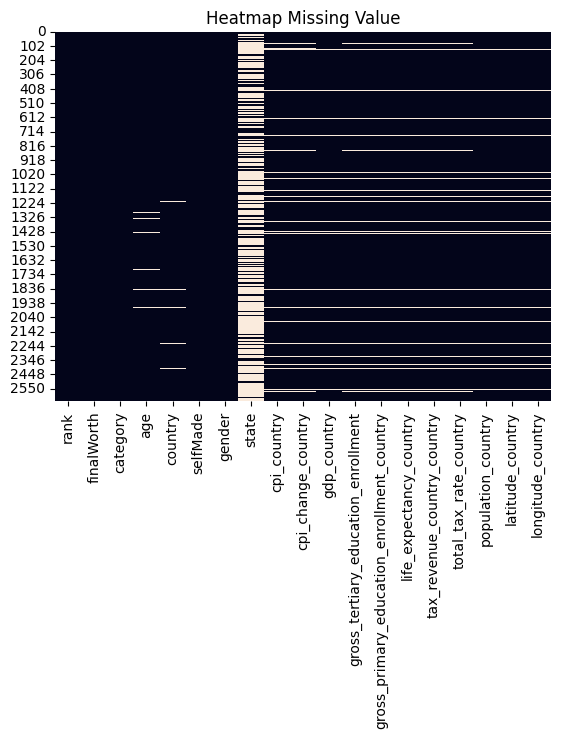

In [ ]:
# Visualisasi Missing Value
sns.heatmap(bill.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
# Jumlah Missing Value
bill.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
age                                             65
country                                         38
selfMade                                         0
gender                                           0
state                                         1887
cpi_country                                    184
cpi_change_country                             184
gdp_country                                    164
gross_tertiary_education_enrollment            182
gross_primary_education_enrollment_country     181
life_expectancy_country                        182
tax_revenue_country_country                    183
total_tax_rate_country                         182
population_country                             164
latitude_country                               164
longitude_country                              164
dtype: int64

In [ ]:
# Persentase Missing Value
(bill.isnull().sum()/len(bill)*100).to_frame('Persentase Missing Value')

,Persentase Missing Value
rank,0.000000
finalWorth,0.000000
category,0.000000
age,2.462121
country,1.439394
selfMade,0.000000
gender,0.000000
state,71.477273
cpi_country,6.969697
cpi_change_country,6.969697


Keterangan

1. **MCAR** : tidak ada alasan khusus kenapa responden tidak mau memberi tahu

  - *Variabel* : country, state, cpi_country, cpi_change_country, gdp_country,     gross_tertiary_education_enrollment, gross_primary_education_enrollment_country, life_expectancy_country, tax_revenue_country_country, total_tax_rate_country, population_country, latitude_country, longitude_country

 - *Penanganan* : Imputasi

2. **MNAR** : ada topik yang sensitif sehingga responden tidak mau memberi tahu

  - *Variabel* : age

  - *Penanganan* : Deletion


In [ ]:
# Menghapus variabel 'state' (karena di variabel 'state' terdapat terlalu banyak missing value)
bill.drop(["state"], axis=1, inplace=True)

# Menghapus baris yang memiliki missing value pada variabel 'age'
bill.dropna(subset=['age'], inplace=True)

# Menghapus baris yang mempunyai missing value lebih dari 2
bill.dropna(thresh=2, inplace=True)

In [ ]:
# Imputasi variabel kategorik dengan modus
bill["country"].fillna(bill["country"].mode()[0], inplace=True)
bill["gdp_country"].fillna(bill["gdp_country"].mode()[0], inplace = True)

In [ ]:
# Imputasi variabel kontinu dengan median
bill["cpi_country"].fillna(bill["cpi_country"].median(), inplace = True)
bill["cpi_change_country"].fillna(bill["cpi_change_country"].median(), inplace = True)
bill["gross_tertiary_education_enrollment"].fillna(bill["gross_tertiary_education_enrollment"].median(), inplace = True)
bill["gross_primary_education_enrollment_country"].fillna(bill["gross_primary_education_enrollment_country"].median(), inplace = True)
bill["life_expectancy_country"].fillna(bill["life_expectancy_country"].median(), inplace = True)
bill["tax_revenue_country_country"].fillna(bill["tax_revenue_country_country"].median(), inplace = True)
bill["total_tax_rate_country"].fillna(bill["total_tax_rate_country"].median(), inplace = True)
bill["population_country"].fillna(bill["population_country"].median(), inplace = True)
bill["latitude_country"].fillna(bill["latitude_country"].median(), inplace = True)
bill["longitude_country"].fillna(bill["longitude_country"].median(), inplace = True)

In [ ]:
# Mengecek kembali jumlah Missing Value
bill.isnull().sum()

rank                                          0
finalWorth                                    0
category                                      0
age                                           0
country                                       0
selfMade                                      0
gender                                        0
cpi_country                                   0
cpi_change_country                            0
gdp_country                                   0
gross_tertiary_education_enrollment           0
gross_primary_education_enrollment_country    0
life_expectancy_country                       0
tax_revenue_country_country                   0
total_tax_rate_country                        0
population_country                            0
latitude_country                              0
longitude_country                             0
dtype: int64

In [ ]:
bill.shape

(2575, 18)

Setelah proses ini, sudah tidak ada lagi data yang hilang. Dengan demikian, ukuran data yang tersisa terdiri dari 2575 baris dan 18 kolom.

## Menambahkan variabel 'age interval'
##### (Langkah ini dilakukan untuk mempersempit pengkategorian pada variabel 'age', maka dilakukan pengkategorian usia menggunakan interval)

In [ ]:
# Mengkategorikan usia dengan jarak interval 20 tahun
bins = [0,20,40,60,80,100,120]
labels = ['0-19','20-39','40-59','60-79','80-99','100-119']
age_interval = bill['age interval'] = pd.cut(bill['age'], bins=bins, labels=labels, right=False)

In [ ]:
bill.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2630,2631,2632,2633,2634,2635,2636,2637,2638,2639
rank,1,2,3,4,5,6,7,8,9,10,...,2540,2540,2540,2540,2540,2540,2540,2540,2540,2540
finalWorth,211000,180000,114000,107000,106000,104000,94500,93000,83400,80700,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
category,Fashion & Retail,Automotive,Technology,Technology,Finance & Investments,Technology,Media & Entertainment,Telecom,Diversified,Technology,...,Manufacturing,Fashion & Retail,Manufacturing,Manufacturing,Healthcare,Healthcare,Food & Beverage,Manufacturing,Real Estate,Diversified
age,74.0,51.0,59.0,78.0,92.0,67.0,81.0,83.0,65.0,67.0,...,35.0,54.0,59.0,53.0,63.0,51.0,80.0,60.0,71.0,66.0
country,France,United States,United States,United States,United States,United States,United States,Mexico,India,United States,...,United States,China,China,China,China,China,United States,China,China,Philippines
selfMade,False,True,True,True,True,True,True,True,False,True,...,False,True,True,True,True,True,False,True,True,False
gender,M,M,M,M,M,M,M,M,M,M,...,F,M,M,M,M,M,M,M,M,M
cpi_country,110.05,117.24,117.24,117.24,117.24,117.24,117.24,141.54,180.44,117.24,...,117.24,125.08,125.08,125.08,125.08,125.08,117.24,125.08,125.08,129.61
cpi_change_country,1.1,7.5,7.5,7.5,7.5,7.5,7.5,3.6,7.7,7.5,...,2.9,2.9,2.9,2.9,2.9,2.9,7.5,2.9,2.9,2.5
gdp_country,"$2,715,518,274,227","$21,427,700,000,000","$21,427,700,000,000","$21,427,700,000,000","$21,427,700,000,000","$21,427,700,000,000","$21,427,700,000,000","$1,258,286,717,125","$2,611,000,000,000","$21,427,700,000,000",...,"$21,427,700,000,000","$19,910,000,000,000","$19,910,000,000,000","$19,910,000,000,000","$19,910,000,000,000","$19,910,000,000,000","$21,427,700,000,000","$19,910,000,000,000","$19,910,000,000,000","$376,795,508,680"


Hasilnya, terdapat penambahan variabel 'age interval' pada data yang mengkategorikan usia dengan jarak interval 20 tahun. Dengan demikian, ukuran variabel berubah menjadi 19 variabel.

## Menghapus duplikat data
##### (Langkah ini dilakukan untuk menghapus duplikasi pada data)

In [ ]:
# Mengecek data yang duplikat
bill[bill.duplicated() == True]

,rank,finalWorth,category,age,country,selfMade,gender,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,age interval
149,148,11500,Healthcare,73.0,Germany,True,M,112.85,1.4,"$3,845,630,030,824",70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526,60-79
360,352,6800,Finance & Investments,61.0,United States,True,M,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,60-79
814,787,3600,Automotive,61.0,China,True,M,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,60-79
1183,1164,2600,Healthcare,58.0,China,True,M,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,40-59
1488,1434,2100,Technology,40.0,United States,True,M,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,40-59
1568,1516,2000,Technology,57.0,China,True,M,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,40-59
1569,1516,2000,Technology,57.0,China,True,M,125.08,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,40-59
1669,1647,1800,Finance & Investments,58.0,United States,True,M,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,40-59
1698,1647,1800,Manufacturing,70.0,India,True,M,180.44,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880,60-79
1782,1725,1700,Real Estate,67.0,United States,True,M,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,60-79


In [ ]:
# Mengecek jumlah data yang duplikat
bill.duplicated().sum()

34

In [ ]:
# Menghapus data yang duplikat
bill.drop_duplicates(keep="first", inplace=True)

In [ ]:
# Mengecek kembali jumlah data yang duplikat
bill.duplicated().sum()

0

In [ ]:
bill.shape

(2541, 19)

Hasilnya, sudah tidak ada lagi data yang duplikat. Dengan demikian, ukuran data yang tersisa terdiri dari 2541 baris dan 19 kolom.

## Noise
##### (Langkah ini dilakukan untuk mengetahui apakah ada kesalahan pada data)

In [ ]:
# Mengecek noise dari variabel kategorik
bill["category"].value_counts()

Finance & Investments         357
Technology                    302
Manufacturing                 301
Fashion & Retail              259
Food & Beverage               201
Healthcare                    191
Real Estate                   189
Diversified                   182
Energy                         97
Media & Entertainment          87
Metals & Mining                73
Automotive                     71
Service                        53
Construction & Engineering     44
Sports                         39
Logistics                      39
Telecom                        31
Gambling & Casinos             25
Name: category, dtype: int64

Dari output di atas, tidak ditemukan noise berupa kesalahan penulisan.

In [ ]:
# Mengecek noise dari variabel kategorik
bill["gender"].value_counts()

M    2234
F     307
Name: gender, dtype: int64

Dari output di atas, tidak ditemukan noise berupa kesalahan penulisan.

In [ ]:
# Mengecek noise dari variabel kategorik
Counter(bill["country"])

Counter({'France': 34,
         'United States': 770,
         'Mexico': 13,
         'India': 155,
         'Spain': 24,
         'China': 484,
         'Canada': 40,
         'Germany': 87,
         'Switzerland': 75,
         'Belgium': 3,
         'Hong Kong': 66,
         'Austria': 11,
         'Japan': 37,
         'United Kingdom': 80,
         'Australia': 42,
         'Indonesia': 25,
         'United Arab Emirates': 16,
         'Russia': 79,
         'Chile': 6,
         'Monaco': 17,
         'Czech Republic': 7,
         'Sweden': 26,
         'Thailand': 25,
         'Uzbekistan': 1,
         'Singapore': 46,
         'Nigeria': 3,
         'Israel': 26,
         'Italy': 55,
         'South Africa': 5,
         'Brazil': 43,
         'Malaysia': 11,
         'South Korea': 29,
         'New Zealand': 2,
         'Philippines': 14,
         'Taiwan': 41,
         'Norway': 9,
         'Egypt': 4,
         'Denmark': 7,
         'Eswatini (Swaziland)': 1,
         'Colomb

Dari output di atas, tidak ditemukan noise berupa kesalahan penulisan.

In [ ]:
# Melihat ringkasan statistik dari variabel kontinu
bill.describe()

,rank,finalWorth,age,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2.541000e+03,2541.000000,2541.000000
mean,1271.998426,4715.505706,65.206218,127.228166,4.294136,67.416253,102.816726,78.136954,12.405549,43.410350,4.915777e+08,34.967726,11.398912
std,739.167181,10001.259942,13.298007,25.932928,3.415775,20.765557,4.606732,3.638962,5.283737,11.711347,5.344539e+08,16.563524,84.369224
min,1.000000,1000.000000,18.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,636.000000,1500.000000,56.000000,117.240000,1.800000,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891
50%,1272.000000,2400.000000,65.000000,117.240000,2.900000,67.000000,101.800000,78.500000,9.600000,38.700000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4300.000000,75.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,55.100000,1.366418e+09,37.090240,104.195397
max,2540.000000,211000.000000,101.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


Dari output di atas, kami tidak dapat menemukan noise.

## Outliers
##### (Langkah ini dilakukan untuk mengetahui apakah ada outlier pada data)

<Axes: xlabel='finalWorth', ylabel='Count'>

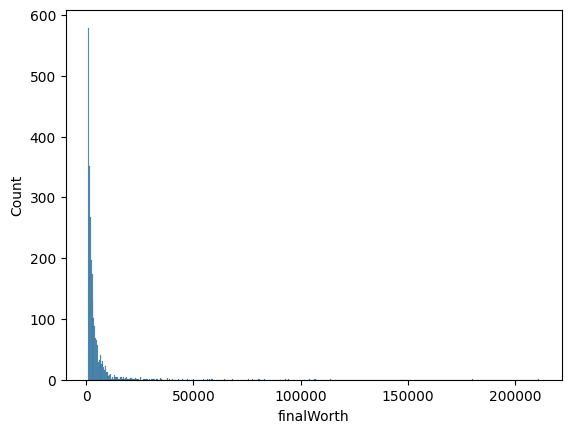

In [ ]:
sns.histplot(bill['finalWorth'])
# Dari histogram ini terlihat bahwa data 'finalWorth' tidak berdistribusi normal

<Axes: xlabel='finalWorth'>

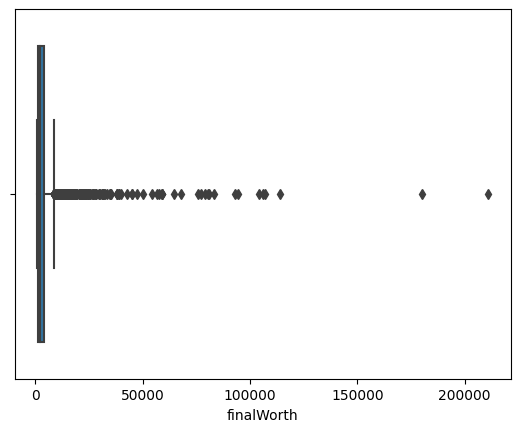

In [ ]:
# Karena data 'finalWorth' tidak berdistribusi normal, maka kami gunakan boxplot
sns.boxplot(x="finalWorth", data=bill)

Dari hasil di atas, dapat dilihat bahwa terdapat outlier pada variabel 'finalWorth'. Namun, kami tidak membuang outlier karena data outlier dibutuhkan pada pengolahan data selanjutnya.

## Save data setelah pre-processing data
##### (Langkah ini dilakukan untuk menyimpan data yang telah melewati pre-processing data)

In [ ]:
bill.to_csv('preprocessed data.csv', index=False)

Hasilnya, data yang telah melewati pre-processing akan tersimpan dalam bentuk .csv

## Permasalahan yang ada saat pre-processing data
1. Terdapat duplikasi pada variabel
2. Terdapat tipe data variabel yang kurang sesuai
3. Terdapat banyak data yang hilang (missing value)
4. Terdapat banyak duplikasi pada data

# STATISTIKA DASAR
##### (Langkah ini dilakukan untuk mengetahui statistika dasar dari data)

In [ ]:
bill.describe()

,rank,finalWorth,age,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2.541000e+03,2541.000000,2541.000000
mean,1271.998426,4715.505706,65.206218,127.228166,4.294136,67.416253,102.816726,78.136954,12.405549,43.410350,4.915777e+08,34.967726,11.398912
std,739.167181,10001.259942,13.298007,25.932928,3.415775,20.765557,4.606732,3.638962,5.283737,11.711347,5.344539e+08,16.563524,84.369224
min,1.000000,1000.000000,18.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,636.000000,1500.000000,56.000000,117.240000,1.800000,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891
50%,1272.000000,2400.000000,65.000000,117.240000,2.900000,67.000000,101.800000,78.500000,9.600000,38.700000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4300.000000,75.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,55.100000,1.366418e+09,37.090240,104.195397
max,2540.000000,211000.000000,101.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [ ]:
bill.describe(include = 'all')

,rank,finalWorth,category,age,country,selfMade,gender,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,age interval
count,2541.000000,2541.000000,2541,2541.000000,2541,2541,2541,2541.000000,2541.000000,2541,2541.000000,2541.000000,2541.000000,2541.000000,2541.000000,2.541000e+03,2541.000000,2541.000000,2541
unique,NaN,NaN,18,NaN,78,2,2,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,Finance & Investments,NaN,United States,True,M,NaN,NaN,"$21,427,700,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60-79
freq,NaN,NaN,357,NaN,770,1754,2234,NaN,NaN,892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1260
mean,1271.998426,4715.505706,NaN,65.206218,NaN,NaN,NaN,127.228166,4.294136,NaN,67.416253,102.816726,78.136954,12.405549,43.410350,4.915777e+08,34.967726,11.398912,NaN
std,739.167181,10001.259942,NaN,13.298007,NaN,NaN,NaN,25.932928,3.415775,NaN,20.765557,4.606732,3.638962,5.283737,11.711347,5.344539e+08,16.563524,84.369224,NaN
min,1.000000,1000.000000,NaN,18.000000,NaN,NaN,NaN,99.550000,-1.900000,NaN,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771,NaN
25%,636.000000,1500.000000,NaN,56.000000,NaN,NaN,NaN,117.240000,1.800000,NaN,50.600000,100.200000,77.000000,9.600000,36.600000,6.705989e+07,35.861660,-95.712891,NaN
50%,1272.000000,2400.000000,NaN,65.000000,NaN,NaN,NaN,117.240000,2.900000,NaN,67.000000,101.800000,78.500000,9.600000,38.700000,3.282395e+08,37.090240,10.451526,NaN
75%,1905.000000,4300.000000,NaN,75.000000,NaN,NaN,NaN,125.080000,7.500000,NaN,88.200000,102.600000,80.900000,12.800000,55.100000,1.366418e+09,37.090240,104.195397,NaN


# BAGIAN 3 - PENGOLAHAN DAN VISUALISASI

## Hubungan antara jumlah kekayaan dengan usia
##### (Menganalisis hubungan antara jumlah kekayaan dengan usia menggunakan catplot)

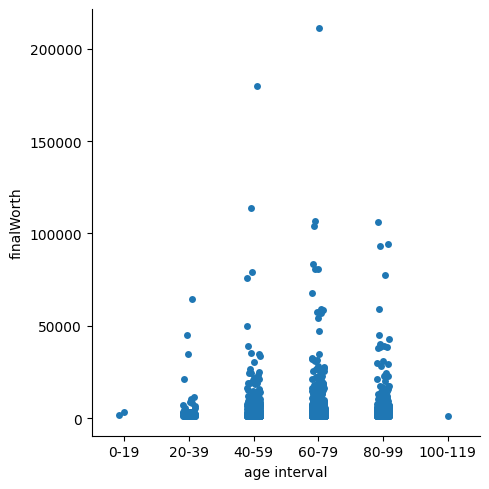

In [ ]:
sns.catplot(x='age interval', y='finalWorth', data=bill)

## Hubungan antara jumlah kekayaan dengan kategori
##### (Menganalisis hubungan antara jumlah kekayaan dengan kategori menggunakan catplot)

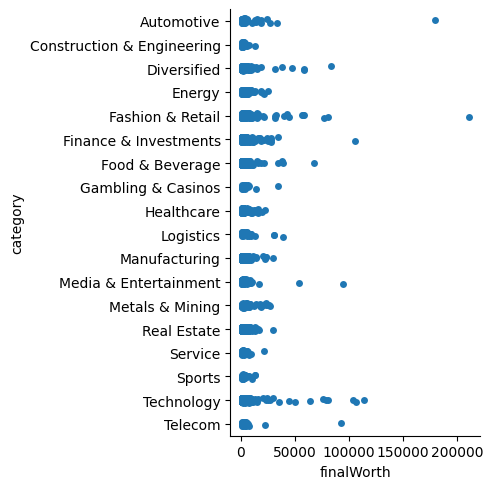

In [ ]:
sns.catplot(x="finalWorth", y="category", data=bill)

## Hubungan antara jumlah kekayaan dengan kategori dan gender
##### (Menganalisis hubungan antara jumlah kekayaan dengan kategori dan gender menggunakan catplot)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 90.0% of the points cannot be plac

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 96.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 80.6% of the points cannot be plac

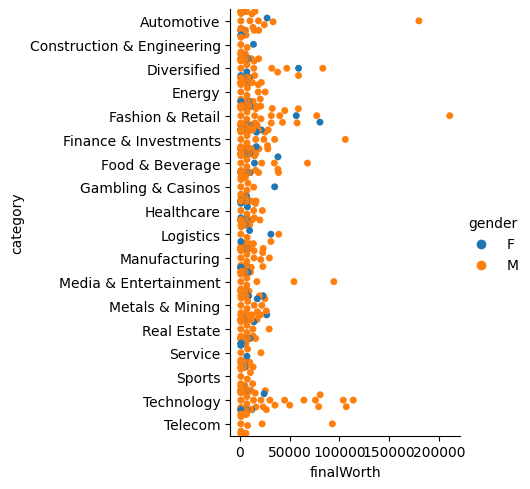

In [ ]:
sns.catplot(x="finalWorth", y="category", hue="gender", kind="swarm", data=bill)

## Hubungan antara kekayaan akhir dengan usia
##### (Menganalisis hubungan antara kekayaan akhir dengan usia menggunakan line graph)

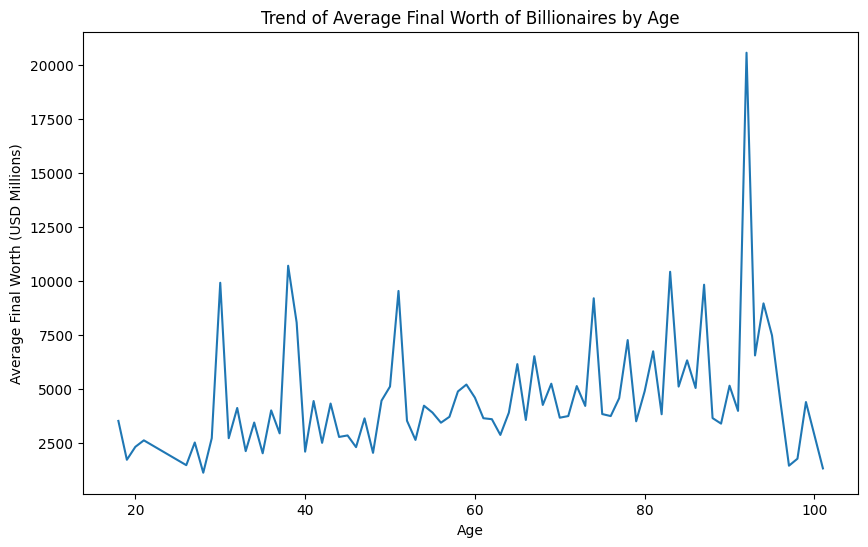

In [ ]:
average_final_worth_by_year = bill.groupby('age')['finalWorth'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_final_worth_by_year.index, average_final_worth_by_year.values)
plt.title('Trend of Average Final Worth of Billionaires by Age')
plt.xlabel('Age')
plt.ylabel('Average Final Worth (USD Millions)')
plt.show()

## Hubungan antara kekayaan selfmade dengan usia dan gender
##### (Menganalisis hubungan antara kekayaan selfmade dengan usia dan gender menggunakan catplot)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.0% of the points cannot be plac

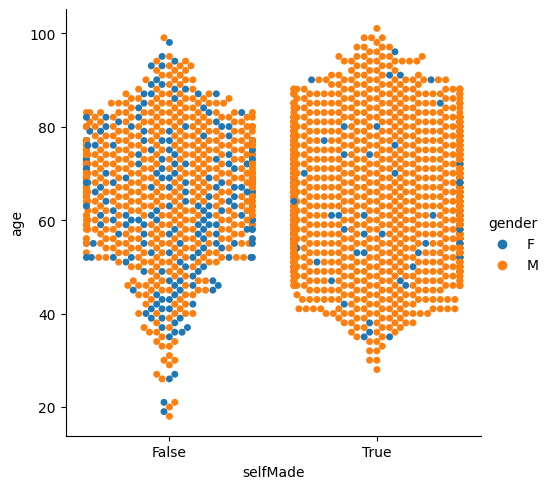

In [ ]:
sns.catplot(x="selfMade", y="age", hue="gender", kind="swarm", data=bill)

##Perbandingan kekayaan miliarder berdasarkan selfmade
##### (Membandingkan kekayaan miliarder berdasarkan selfmade menggunakan pie chart)

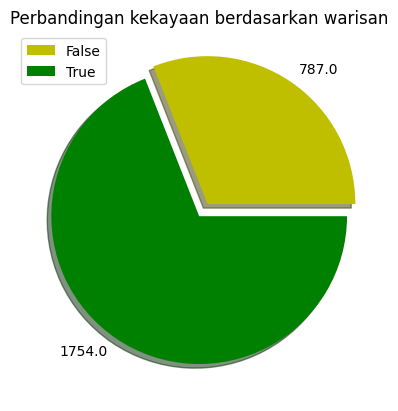

In [ ]:
selfmade1 = bill['selfMade']

proporsion = Counter(selfmade1)
values = [float(v) for v in proporsion.values()]
colors = ['y', 'g']
labels = proporsion.keys()
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Perbandingan kekayaan berdasarkan warisan')
plt.legend(labels,loc='best')
plt.show()

##Perbandingan miliarder berdasarkan gender
##### (Membandingkan miliarder berdasarkan gender menggunakan pie chart)

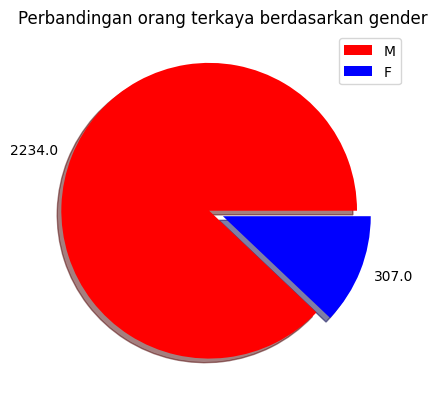

In [ ]:
jenis_kelamin = bill['gender']

proporsion = Counter(jenis_kelamin)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'b']
labels = proporsion.keys()
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Perbandingan orang terkaya berdasarkan gender')
plt.legend(labels,loc='best')
plt.show()

## Hubungan antara gender dengan usia
##### (Menganalisis hubungan antara gender dengan usia menggunakan catplot)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


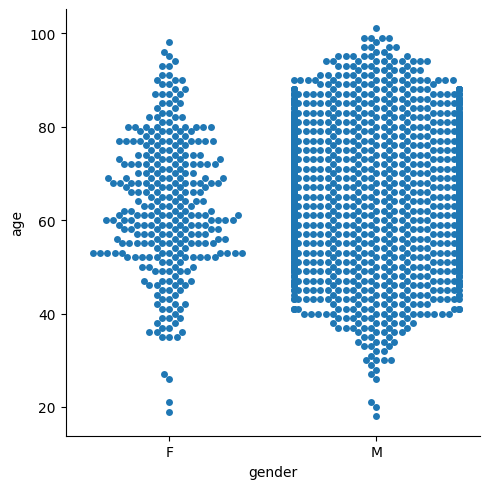

In [ ]:
sns.catplot(x="gender",y="age", kind="swarm", data=bill)

##Top 10 negara dengan miliarder terbanyak
##### (Menemukan top 10 negara dengan miliarder terbanyak menggunakan peta)

In [ ]:
bill['country'].value_counts().nlargest(10)

United States     770
China             484
India             155
Germany            87
United Kingdom     80
Russia             79
Switzerland        75
Hong Kong          66
Italy              55
Singapore          46
Name: country, dtype: int64

<ipython-input-47-fd0b0f0df08e>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


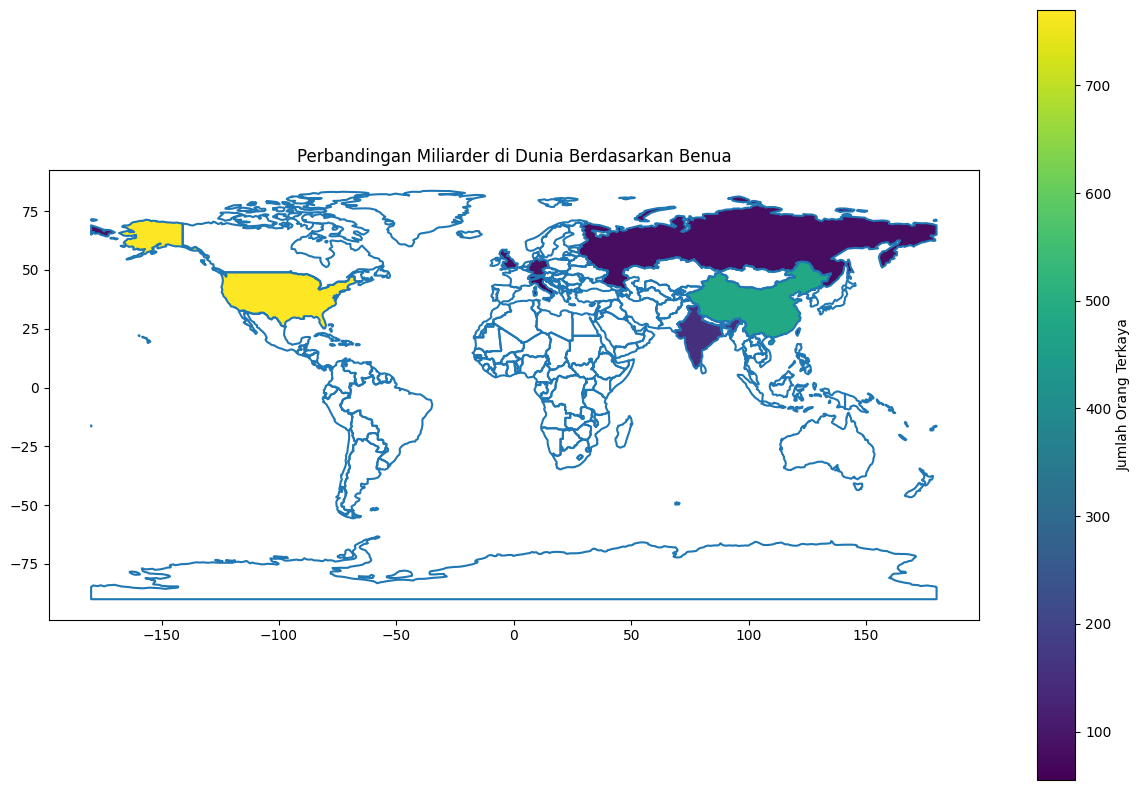

In [ ]:
# Data
data_orang_terkaya = {
    'United States of America': 770,
    'China': 484,
    'India': 155,
    'Germany': 87,
    'United Kingdom': 80,
    'Russia' : 79,
    'Switzerland' : 75,
    'Taiwan' : 66,
    'Italy' : 55,
    'Singapore' : 46
}

# Lokasi file shapefile untuk peta dunia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Gabungkan data orang terkaya dengan data peta dunia
world = world.merge(
    pd.DataFrame(list(data_orang_terkaya.items()), columns=['negara', 'Jumlah Orang Terkaya']),
    left_on='name',
    right_on='negara',
    how='left'
)

# Plot peta dengan warna yang sesuai
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Jumlah Orang Terkaya', ax=ax, legend=True, legend_kwds={'label': "Jumlah Orang Terkaya"})
plt.title('Perbandingan Miliarder di Dunia Berdasarkan Benua')
plt.show()

##Peta pesebaran miliarder di seluruh dunia
##### (Melihat peta pesebaran miliarder di seluruh dunia)

In [ ]:
# membuat peta
m = folium.Map(location=[30, 0], zoom_start=2)

# menambahkan mark pada setiap negara yang terdapat miliarder
for index, row in bill.iterrows():
    if row['finalWorth'] > 0:
        folium.Marker([row['latitude_country'], row['longitude_country']]).add_to(m)

# menampilkan peta
m

## Hubungan antara benua, usia, dan gender
##### (Menganalisis hubungan antara benua, usia, dan gender menggunakan catplot)

In [ ]:
# Create a dictionary to map countries to their respective continents
continent_dict = {
    'Indonesia': 'Asia',
    'United States': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Brazil': 'South America',
    'Russia': 'Europe',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'Hong Kong': 'Asia',
    'France': 'Europe',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Australia': 'Australia',
    'Japan': 'Asia',
    'Spain': 'Europe',
    'South Korea': 'Asia',
    'Switzerland': 'Europe',
    'Taiwan': 'Asia',
    'Singapore': 'Asia',
    'Mexico': 'North America',
    'Sweden': 'Europe',
    'Netherlands': 'Europe',
    'Turkey': 'Asia',
    'Thailand': 'Asia',
    'Norway': 'Europe',
    'Denmark': 'Europe',
    'Saudi Arabia': 'Asia',
    'Israel': 'Asia',
    'Malaysia': 'Asia',
    'Ireland': 'Europe',
    'Austria': 'Europe',
    'Greece': 'Europe',
    'Finland': 'Europe',
    'Belgium': 'Europe',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'New Zealand': 'Australia',
    'Czech Republic': 'Europe',
    'Romania': 'Europe',
    'Chile': 'South America',
    'Hungary': 'Europe',
    'Colombia': 'South America',
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    'Pakistan': 'Asia',
    'Nigeria': 'Africa',
    'Argentina': 'South America',
    'Morocco': 'Africa',
    'Bangladesh': 'Asia',
    'Vietnam': 'Asia',
    'Peru': 'South America',
    'Venezuela': 'South America',
    'Ukraine': 'Europe',
    'Algeria': 'Africa',
    'Kazakhstan': 'Asia',
    'Qatar': 'Asia',
    'Oman': 'Asia',
    'Kuwait': 'Asia',
    'United Arab Emirates': 'Asia',
    'Sri Lanka': 'Asia',
    'Ethiopia': 'Africa',
    'Ghana': 'Africa',
    'Kenya': 'Africa',
    'Tanzania': 'Africa',
    'Jordan': 'Asia',
    'Lebanon': 'Asia',
    'Serbia': 'Europe',
    'Tunisia': 'Africa',
    'Bahrain': 'Asia',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Croatia': 'Europe',
    'Bulgaria': 'Europe',
    'Estonia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Cyprus': 'Asia',
    'Iceland': 'Europe',
    'Luxembourg': 'Europe',
    'Uruguay': 'South America',
    'Costa Rica': 'North America',
    'Panama': 'North America',
    'Ecuador': 'South America',
    'Tajikistan': 'Asia',
    'Georgia': 'Asia',
    'Bosnia and Herzegovina': 'Europe',
    'Paraguay': 'South America',
    'Armenia': 'Asia',
    'Moldova': 'Europe',
    'Albania': 'Europe',
    'Liberia': 'Africa',
    'Mongolia': 'Asia',
    'Jamaica': 'North America',
    'Namibia': 'Africa',
    'Lesotho': 'Africa',
    'Macedonia': 'Europe',
    'Slovenia': 'Europe',
    'Botswana': 'Africa',
    'Gabon': 'Africa',
    'Latvia': 'Europe',
    'Guinea': 'Africa',
    'Kosovo': 'Europe',
    'Bahrain': 'Asia',
    'Trinidad and Tobago': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'East Timor': 'Asia',
    'Mauritius': 'Africa',
    'Swaziland': 'Africa',
    'Djibouti': 'Africa',
    'Fiji': 'Australia',
    'Comoros': 'Africa',
    'Guyana': 'South America',
    'Bhutan': 'Asia',
    'Solomon Islands': 'Australia',
    'Macau': 'Asia',
    'Montenegro': 'Europe',
    'Luxembourg': 'Europe',
    'Western Sahara': 'Africa',
    'Suriname': 'South America',
    'Cape Verde': 'Africa',
    'Maldives': 'Asia',
    'Brunei': 'Asia',
    'Malta': 'Europe',
    'Bahamas': 'North America',
    'Iceland': 'Europe',
    'Belize': 'North America',
    'Barbados': 'North America',
    'Vanuatu': 'Australia',
    'Samoa': 'Australia',
    'Saint Lucia': 'North America',
    'Kiribati': 'Australia',
    'Grenada': 'North America',
    'Tonga': 'Australia',
    'Federated States of Micronesia': 'Australia',
    'Seychelles': 'Africa',
    'Andorra': 'Europe',
    'Dominica': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Marshall Islands': 'Australia',
    'Liechtenstein': 'Europe',
    'San Marino': 'Europe',
    'Palau': 'Australia',
    'Tuvalu': 'Australia',
    'Nauru': 'Australia',
    'Monaco': 'Europe',
    'Saint Kitts and Nevis': 'North America',
    'Holy See': 'Europe'
}

# Add a new column to the dataframe with the continent information
bill['Continent'] = bill['country'].map(continent_dict)

# Group the data by continent and country and display the results
grouped_df = bill.groupby(['Continent', 'country']).size().reset_index(name='Count')
print(grouped_df)
bill.dropna(subset=['Continent'], inplace=True)

         Continent         country  Count
0           Africa         Algeria      1
1           Africa         Andorra      0
2           Africa       Argentina      0
3           Africa         Armenia      0
4           Africa       Australia      0
..             ...             ...    ...
463  South America  United Kingdom      0
464  South America   United States      0
465  South America         Uruguay      1
466  South America      Uzbekistan      0
467  South America         Vietnam      0

[468 rows x 3 columns]


In [ ]:
Counter(bill['Continent'])

Counter({'Europe': 561,
         'North America': 825,
         'Asia': 1026,
         'Australia': 44,
         'South America': 56,
         'Africa': 16})

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.6% of the points cannot be plac

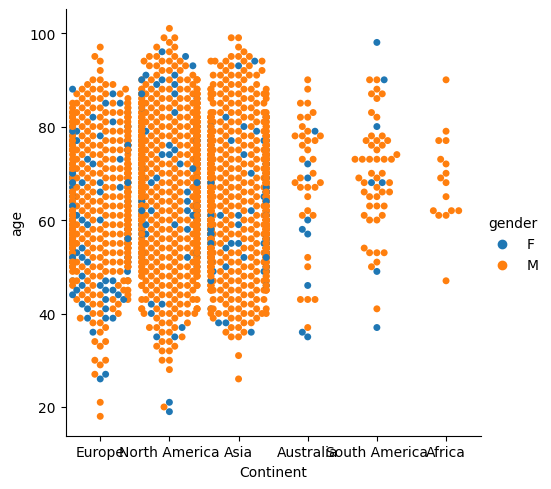

In [ ]:
sns.catplot(x="Continent", y="age", hue="gender", kind="swarm", data=bill)

## Hubungan antara kekayaan milyader dengan pajak negaranya
##### (Menganalisis hubungan antara kekayaan miliader dengan pajak negaranya negaranya menggunakan barplot)

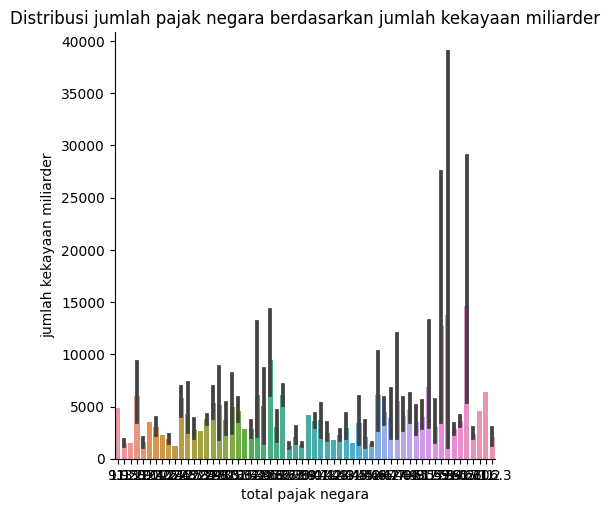

In [ ]:
sns.catplot(y='finalWorth', x='total_tax_rate_country', data=bill, kind='bar')
plt.title('Distribusi jumlah pajak negara berdasarkan jumlah kekayaan miliarder')

plt.ylabel('jumlah kekayaan miliarder')

plt.xlabel('total pajak negara')

plt.show()

## Kesinambungan antar hasil yang diperoleh

**Kesinambungan antara hubungan top 10 negara dengan jumlah miliarder terbanyak & hubungan jumlah kekayaan dan kategori**

- Rata-rata kekayaan miliarder berasal dari bidang teknologi. Hal ini menunjukkan bidang industri tersebut memiliki potensi menghasilkan kekayaan yang besar pada top 10 negara dengan jumlah miliarder terbanyak.

**Kesinambungan antara hubungan jumlah kekayaan dan kategori & perbandingan kekayaan berdasarkan self made**

- Industri teknologi memiliki persentase miliarder selfmade tertinggi. Hal ini menunjukkan bahwa industri teknologi memiliki peluang yang lebih besar untuk menjadi miliarder.


**Kesinambungan top 10 negara dengan miliarder terbanyak & hubungan antara gender dengan usia**

- Negara-negara pada top 10 memiliki kondisi yang kondusif demi pengembangan usaha, yang bisa menciptakan peluang lebih besar demi menjadi miliarder. Miliarder pada usia 40 tahun ke atas memiliki berbagai pengalaman  yang lebih luas dalam menghadapi tantangan pasar, sehingga hal ini membuat miliarder berusia di atas 40 tahun lebih tahan dalam menghadapi risiko dan dapat mempertahankan status kekayaan mereka sebagai miliarder.


## Konstruksi Cerita

Hasil analisis tersebut dapat dikonstruksikan menjadi cerita yang "utuh" mengenai miliarder di dunia.
- Dari hasil analisis data yang telah dilakukan, dapat diceritakan bahwa banyak miliarder memiliki kekayaan dari industri teknologi, maka hal ini menunjukkan industri teknologi mempunyai potensi yang besar untuk menghasilkan kekayaan pada pribadi seseorang demi menjadi miliarder.
- Industri teknologi lebih banyak diminati, sehingga banyak miliarder yang memiliki kekayaan pada bidang industri teknologi. Dan juga industri ini memiliki kesempatan lebih besar untuk berinovasi. Sehingga orang dengan berbagai ide dan kreativitas punya peluang yang lebih besar demi menjadi miliarder melalui industri teknologi.
- Pada bagian top 10 negara dengan jumlah miliarder terbanyak, dapat dilihat negara yang menduduki top 10 tersebut adalah negara yang memiliki perekonomian yang kuat. Negara dengan perekonomian yang kuat serta stabil memiliki peluang yang besar untuk menghasilkan kekayaan demi menjadi miliarder. Dan pastinya didukung dengan kebijakan-kebijakan pada negara-negara tersebut, sehingga pertumbuhan dan perkembangan usaha-usaha dapat menciptakan tumbuhnya miliarder dari negara tersebut.
- Terdapat hubungan antara kekayaan miliarder dengan usia. Miliarder di dunia didominasi dengan miliarder berusia senja, karena mereka yang usianya di atas 40 memiliki berbagai pengalaman yang lebih banyak sehingga miliarder berusia 40 tahun ke atas bisa menghadapi risiko dengan baik serta mempertahankan kekayaan mereka sebagai miliarder.

## Informasi Bermakna

Terdapat banyak informasi bermakna yang dihasilkan dari proses ini. Dari hubungan antara kekayaan miliarder dengan usia, diperoleh informasi bahwa 70% miliarder masih berada pada usia produktif, dan sisanya penghasilan tertinggi dicapai saat mereka memasuki usia senja. Selain itu didapat informasi bahwa rata-rata kekayaan miliarder berasal dari bidang industri teknologi, dan ada miliarder yang memiliki pendapatan tertinggi berasa dari bidang fashion and retail. Lebih jauh lagi, kita mendapatkan informasi bahwa sumber kekayaan miliarder lebih banyak berasal dari usaha sendiri, yang berarti sebagian besar miliarder merupakan seorang perintis usaha yang memulai bisnisnya sendiri. Gender laki-laki mendominasi pada perbandingan kekayaan berdasarakan gender, hal ini menunjukkan adanya ketidakseimbangan antara laki-laki dan peremuan dalam hal kekayaan. Serta didapat informasi sumber kekayaan miliarder yang merintis bisnisnya sendiri cenderung lebih banyak pada gender laki-laki.

# BAGIAN 4 - PENUTUP

Kesimpulan yang didapat dari pengolahan data ini adalah sebagai berikut:   
1. Hubungan antara jumlah kekayaan dengan usia.
  
  Dari hubungan antara jumlah kekayaan miliarder dengan usia, diperoleh informasi bahwa 70% miliarder masih berada pada usia produktif, dan sisanya penghasilan tertinggi dicapai saat mereka memasuki usia senja.

2. Hubungan antara jumlah kekayaan dengan kategori.
  
  Dari hubungan antara jumlah kekayaan miliarder dengan kategori, diperoleh informasi bahwa rata-rata jumlah kekayaan miliarder berasal dari bidang teknologi. Adapun miliarder dengan pendapatan tertinggi berasal dari bidang fashion and retail.

3. Hubungan antara jumlah kekayaan dengan kategori dan gender.

  Dari hubungan antara jumlah kekayaan miliarder dengan kategori dan gender, diperoleh informasi bahwa kebanyakan milIarder berjenis kelamin laki-laki. Bidang bisnis yang paling banyak diminati adalah teknologi serta fashion and retail. Adapun miliarder pria dengan pendapatan tertinggi berasal dari bidang fashion and retail.

4. Hubungan antara kekayaan akhir tahun dengan usia.

  Dari hubungan antara kekayaan akhir tahun dengan usia, diperoleh informasi bahwa rata-rata pendapatan tertinggi miliarder berada pada saat mereka berusia senja.

5. Hubungan antara kekayaan selfmade dengan usia dan gender.

  Dari hubungan antara kekayaan selfmade dengan usia dan gender, diperoleh informasi bahwa sumber kekayaan miliyader yang merintis bisnisnya sendiri cenderung lebih banyak pada gender laki-laki.  

6. Perbandingan kekayaan miliarder berdasarkan selfmade.

   Dari perbandingan kekayaan miliarder berdasarkan selfmade, diperoleh informasi bahwa 68,12% kekayaan milyarder berasal dari usaha sendiri sedangkan 30,56% kekayaan milyarder berasal dari warisan. Hal ini menunjukan sebagian besar milyarder adalah seorang perintis yang memulai bisnisnya sendiri.

7. Perbandingan miliarder berdasarkan gender.
  
   Dari penyaringan data miliarder berdasarkan gender menunjukkan bahwa terdapat miliarder sebanyak 87.9% merupakan laki-laki dan sebanyak 12.09% merupakan perermpuan. Hal menunjukkan bahwa mayoritas miliarder merupakan laki-laki.

8. Hubungan antara gender dengan usia.

   Berdasarkan hubungan gender dengan usia didapatkan bahwa kebanyakan miliarder laki-laki berada di usia 40 hingga 80 tahun, sedangkan kebanyakan miliarder perempuan berada di usia 50 hingga 80 tahun. Ini membuktikan bahwa umur bukan hal yang dapat menghambat seseorang menjadi hebat. Dan juga membuktikan jika seseorang terpenuhi di bagian finansial, maka berbagai aspek kehidupannya akan terpenuhi yang menyebabkan para miliarder memiliki umur yang panjang.

9. Top 10 negara dengan miliarder terbanyak.

   Berdasarkan negara yang terdapat miliarder terbanyak. Dapat disimpulkan bahwa United States dan China secara konsisten menempati peringkat teratas dalam jumlah miliarder, sementara negara-negara lain seperti india, germany, dan juga United Kingdom memiliki kontribusi yang signifikan dalam hal jumlah miliarder.

10. Peta pesebaran miliarder di seluruh dunia.
    
    Pada peta persebaran miliarder di seluruh dunia masih banyak negara-negara yang tidak memiliki miliarder yang terdaftar. Hal ini dapat menjadi dorongan untuk orang yang tinggal di negara tersebut agar negaranya dapat berpartisipasi dalam pendataan miliarder selanjutnya.

11. Hubungan antara benua, usia, dan gender.

    Berdasarkan hubungan antara benua, usia, dan gender menunjukan bahwa miliarder di benua Asia kebanyakan adalah laki- laki di usia 25 hingga 100 tahun. Sedangkan di benua Afrika hanya terdapat miliarder laki-laki saja yaitu di usia 45 hingga 90 tahun. Hal ini menunjukkan bahwa tidak semua benua terdapat miliarder perempuan, dan juga mayoritas miliarder berada di usia 45 hingga 100 tahun.

12. Hubungan antara kekayaan miliarder dengan pajak negaranya.

    Berdasarkan hubungan antara kekayaan miliarder dengan pajak negaranya. Dapat disimpulkan bahwa semakin besar jumlah kekayaan miliyader, maka semakin besar pula pendapatan pajak negara tersebut.

Link Google Drive : https://drive.google.com/drive/folders/16dV1wHhJqshcWsN_cp6qHdo2aZSSz6uE?usp=drive_link